Relax and hold steady part 2

Poisson equation has forcing function that drives solutino to steady state:

$$\frac{\partial ^2 p}{\partial x^2} + \frac{\partial ^2 p}{\partial y^2} = b$$


In discretized form:

$$\frac{p_{i+1,j}^{k}-2p_{i,j}^{k}+p_{i-1,j}^{k}}{\Delta x^2}+\frac{p_{i,j+1}^{k}-2 p_{i,j}^{k}+p_{i,j-1}^{k}}{\Delta y^2}=b_{i,j}^{k}$$

Rearrange this:

$$p_{i,j}^{k+1}=\frac{(p_{i+1,j}^{k}+p_{i-1,j}^{k})\Delta y^2+(p_{i,j+1}^{k}+p_{i,j-1}^{k})\Delta x^2-b_{i,j}^{k}\Delta x^2\Delta y^2}{2(\Delta x^2+\Delta y^2)}$$


Example problem:

Consider Following Poisson Equation:

\begin{equation}
\nabla^2 p = -2\left(\frac{\pi}{2}\right)^2\sin\left( \frac{\pi x}{L} \right) \cos\left(\frac{\pi y}{L}\right)
\end{equation}

in domain:

$$\left\lbrace \begin{align*}
0 &\leq x\leq 1  \\
-0.5 &\leq y \leq 0.5 
\end{align*} \right.$$

with Dirichlet BC:

$$p=0 \text{ at } \left\lbrace 
\begin{align*}
x&=0\\
y&=0\\
y&=-0.5\\
y&=0.5
\end{align*} \right.$$

To solve we assume initial state p=0 everywhere


In [1]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot, cm
from math import pi
import numpy
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16


In [3]:
nx = 41
ny = 41
xmin = 0
xmax = 1
ymin = -0.5
ymax = 0.5

target = 1e-10

def initialize(nx, ny, xmax,xmin,ymax,ymin):
    dx = (xmax-xmin)/(nx-1)
    dy = (ymax-ymin)/(ny-1)
    
    x = numpy.linspace(xmin,xmax,nx)
    y = numpy.linspace(ymin,ymax,ny)
    X,Y = numpy.meshgrid(x,y)
    
    L = xmax-xmin
    b = -2*(pi/L)**2*numpy.sin(pi*X/L)*numpy.cos(pi*Y/L)
    
    p_i = numpy.zeros((ny,nx))
    
    return X,Y,x,y,p_i,b,dx,dy,L
    

In [5]:
from laplace_helper import L2_rel_error

In [6]:
def poisson_2d(p,b,dx,dy,target):
    norm = 1
    iterations = 0
    conv = []
    
    while norm > target:
        pd = p.copy()
        p[1:-1,1:-1] = 1/(2*(dx**2 + dy**2)) * \
                        ((pd[1:-1,2:]+pd[1:-1,:-2])*dy**2 +\
                        (pd[2:,1:-1] + pd[:-2,1:-1])*dx**2 -\
                         b[1:-1,1:-1]*dx**2*dy**2)
    
        norm = L2_rel_error(pd,p)
        iterations +=1
        conv.append(norm)
    print('Number of Jacobi iterations: {0:d}'.format(iterations))
    return p, conv        

In [7]:
from laplace_helper import plot_3D

AttributeError: 'module' object has no attribute 'viridis'

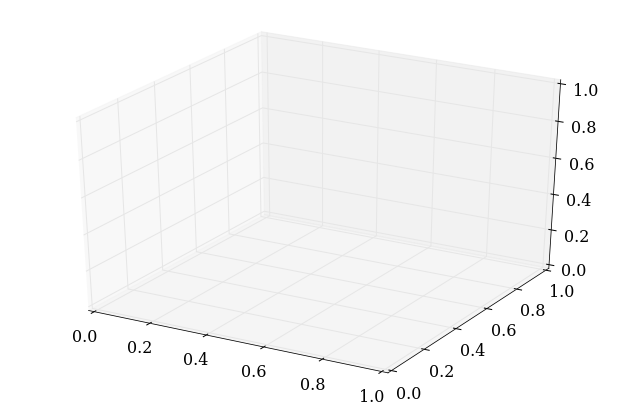

In [8]:
X, Y, x, y, p_i, b, dx, dy, L = initialize(nx, ny, xmax, xmin, ymax, ymin)
plot_3D(x, y, p_i)

In [9]:
p, conv = poisson_2d(p_i.copy(), b , dx, dy, target)

Number of Jacobi iterations: 5587


AttributeError: 'module' object has no attribute 'viridis'

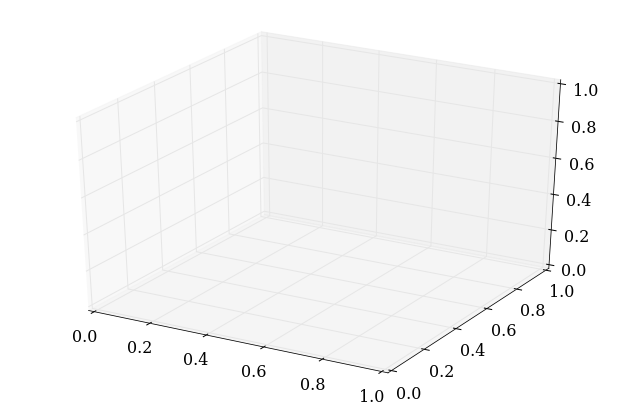

In [10]:
plot_3D(x,y,p)

This problem has the following analytical solution:

\begin{equation}
p(x,y) = \sin{\left(\frac{x\pi}{L} \right)}\cos{\left(\frac{y\pi}{L} \right)}
\end{equation}

In [11]:
def p_analytical(X,Y,L):
    return numpy.sin(X*pi/L)*numpy.cos(Y*pi/L)

In [12]:
p_an = p_analytical(X,Y,L)

In [13]:
error = L2_rel_error(p,p_an)
error


0.00051416820220736182

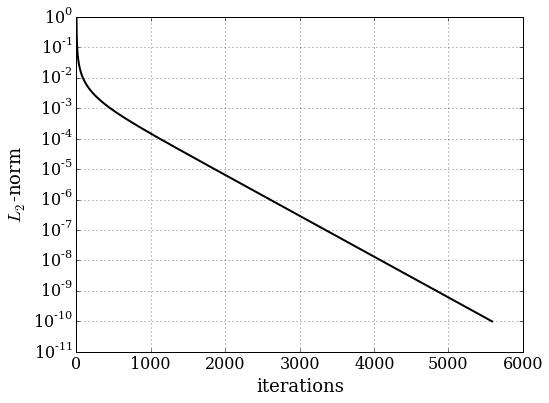

In [15]:
#Algebraic Convergence
pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.xlabel(r'iterations', fontsize=18)
pyplot.ylabel(r'$L_2$-norm', fontsize=18)
pyplot.semilogy(numpy.arange(len(conv)), conv, lw=2, color='k');

In [17]:
#Spatial Convergence

nx_values = numpy.asarray([11,21,41,81])
ny_values = numpy.asarray([11,21,41,81])

error = numpy.zeros(len(nx_values))

for i in range(len(nx_values)):
    nx = nx_values[i]
    ny = ny_values[i]
    
    X, Y, c, y, p_i, b, dx, dy, L = initialize(nx, ny, xmax, xmin, ymax, ymin)
    p, conv = poisson_2d(p_i.copy(), b, dx, dy, target)

    p_an = p_analytical(X,Y,L)
    error[i] = L2_rel_error(p,p_an)

Number of Jacobi iterations: 400
Number of Jacobi iterations: 1505
Number of Jacobi iterations: 5587
Number of Jacobi iterations: 20563


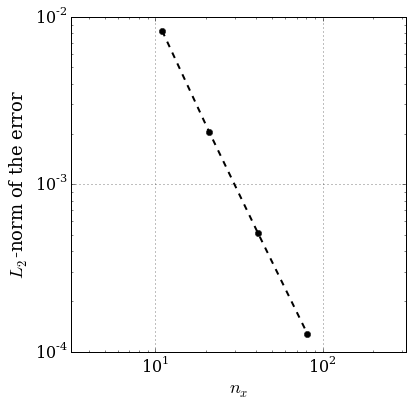

In [18]:
pyplot.figure(figsize=(6,6))
pyplot.grid(True)
pyplot.xlabel(r'$n_x$', fontsize=18)
pyplot.ylabel(r'$L_2$-norm of the error', fontsize=18)
pyplot.loglog(nx_values, error, color='k', ls='--', lw=2, marker='o')
pyplot.axis('equal');